In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Importing Dataset
df=pd.read_csv('Mall_Customers.csv')
print(df.head())
print()
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000      


DESCRIPTION OF GENDER FROM THE DATASET ::


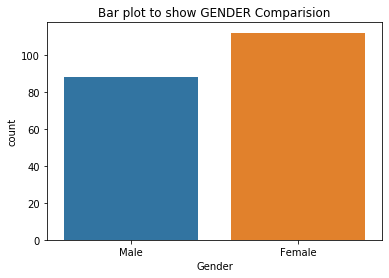

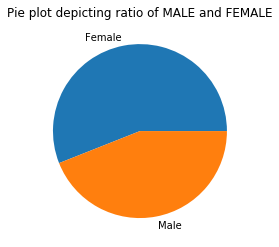

In [7]:
#Describing GENDER 
print()
print('DESCRIPTION OF GENDER FROM THE DATASET ::')
df['Gender'].describe()
sns.countplot(x ='Gender', data = df)     #Used to show the count of observations in categorical variable 
plt.title('Bar plot to show GENDER Comparision')
plt.show()

plt.pie(100*df['Gender'].value_counts()/len(df),labels=['Female','Male'])
plt.title('Pie plot depicting ratio of MALE and FEMALE')
plt.show()


DESCRIPTION OF AGE FROM THE DATASET ::


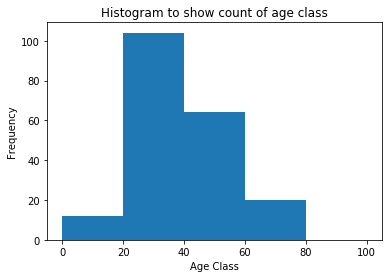

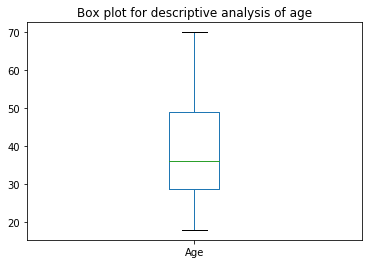

In [4]:
#Describing AGE
print()
print('DESCRIPTION OF AGE FROM THE DATASET ::')
df['Age'].describe()

#Histogram shows the no. of data present in the given range

plt.hist(df['Age'],bins=[0,20,40,60,80,100]) 
plt.title("Histogram to show count of age class") 
plt.xlabel('Age Class')
plt.ylabel('Frequency')
plt.show()

# Box plot is used to visualise the summary of the data having properties
# like minimum, first quartile, median, third quartile and maximum.
# x-axis denotes the data to be plotted
# y-axis shows the frequency distribution.

df['Age'].plot.box()
plt.title('Box plot for descriptive analysis of age')
plt.show()


DESCRIPTION OF ANNUAL INCOME FROM THE DATASET ::


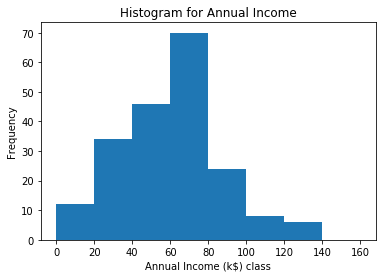

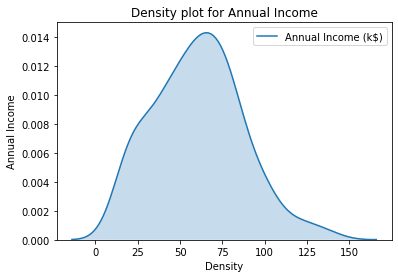

In [5]:
#Describing Annual Income
print()
print('DESCRIPTION OF ANNUAL INCOME FROM THE DATASET ::')
df['Annual Income (k$)'].describe()
plt.hist(df['Annual Income (k$)'],bins=[0,20,40,60,80,100,120,140,160])
plt.title('Histogram for Annual Income')
plt.xlabel('Annual Income (k$) class')
plt.ylabel('Frequency')
plt.show()

sns.kdeplot(df['Annual Income (k$)'],shade=True)
plt.title('Density plot for Annual Income')
plt.xlabel('Density')
plt.ylabel('Annual Income')
plt.show()


DESCRIPTION OF SPENDING SCORE (1-100) FROM THE DATASET


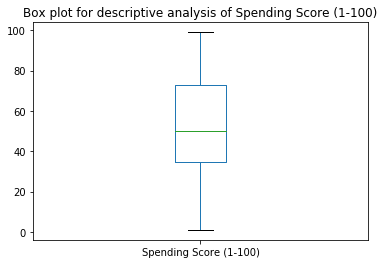

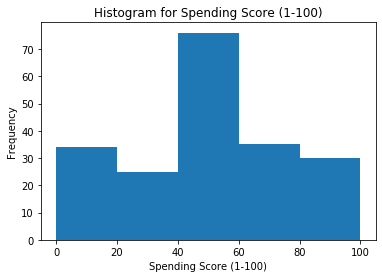

In [6]:
#Describing Spending Score
print()
print('DESCRIPTION OF SPENDING SCORE (1-100) FROM THE DATASET')
df['Spending Score (1-100)'].describe()
df['Spending Score (1-100)'].plot.box()
plt.title('Box plot for descriptive analysis of Spending Score (1-100)')
plt.show()

plt.hist(df['Spending Score (1-100)'],bins=[0,20,40,60,80,100])
plt.title('Histogram for Spending Score (1-100)')
plt.ylabel('Frequency')
plt.xlabel('Spending Score (1-100)')
plt.show()

In [7]:
# K-Means Clustering

X = df.iloc[:,[3,4]].values   #Between Annual Income and Spending
Y = df.iloc[:,[2,4]].values   #Between Age and Spending
Z = df.iloc[:,[1,4]].values   #Between Gender and Spending

RELATION BETWEEN ANNUAL INCOME AND SPENDING ::


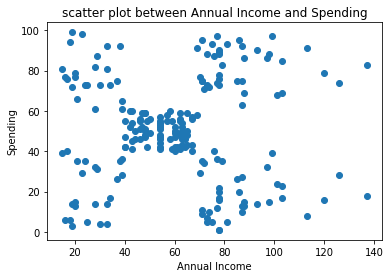

RELATION BETWEEN AGE AND SPENDING ::


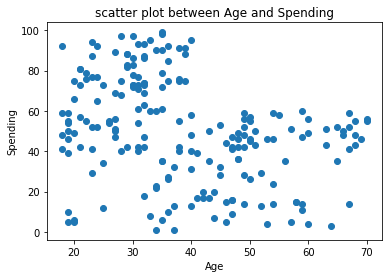

RELATION BETWEEN GENDER AND SPENDING ::


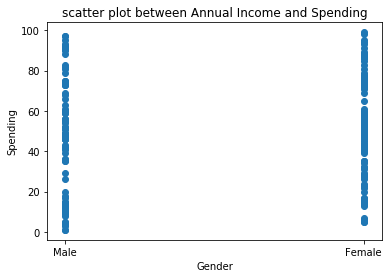

In [8]:
#Plotting of ANNUAL_INCOME AGE GENDER with SPENDING

print('RELATION BETWEEN ANNUAL INCOME AND SPENDING ::')
plt.scatter(x=df.iloc[:,3],y=df.iloc[:,4])
plt.xlabel('Annual Income')
plt.ylabel('Spending')
plt.title('scatter plot between Annual Income and Spending')
plt.show()

print('RELATION BETWEEN AGE AND SPENDING ::')
plt.scatter(x=df.iloc[:,2],y=df.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Spending')
plt.title('scatter plot between Age and Spending')
plt.show()

print('RELATION BETWEEN GENDER AND SPENDING ::')
plt.scatter(x=df.iloc[:,1],y=df.iloc[:,4])
plt.xlabel('Gender')
plt.ylabel('Spending')
plt.title('scatter plot between Annual Income and Spending')
plt.show()

In [9]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss_X = []
wcss_Y = []

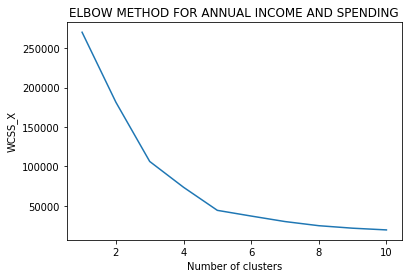

In [10]:
for i in range(1, 11):
    kmeans_X = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_Y = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)

    kmeans_X.fit(X)
    kmeans_Y.fit(Y)
    
    wcss_X.append(kmeans_X.inertia_)

    wcss_Y.append(kmeans_Y.inertia_)

    
plt.plot(range(1, 11), wcss_X)
plt.title('ELBOW METHOD FOR ANNUAL INCOME AND SPENDING')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_X')
plt.show()

In [11]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

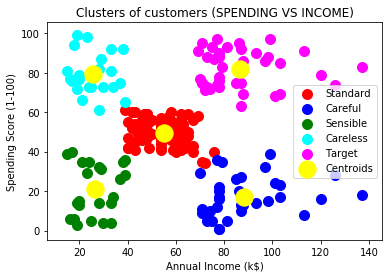

In [12]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Careful')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Sensible')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Target')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers (SPENDING VS INCOME)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

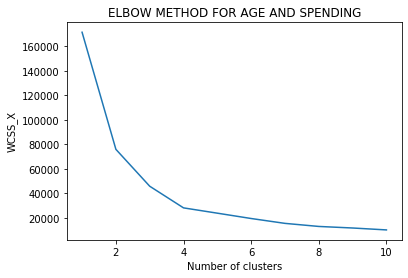

In [13]:
plt.plot(range(1, 11), wcss_Y)
plt.title('ELBOW METHOD FOR AGE AND SPENDING')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_X')
plt.show()

In [14]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Y)

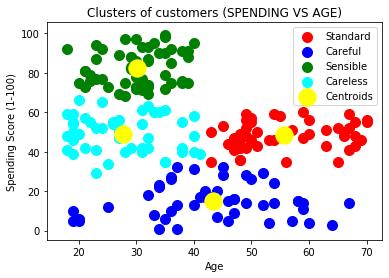

In [15]:
# Visualising the clusters
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Careful')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Sensible')
plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers (SPENDING VS AGE)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()